In [2]:
! eups list -s lsst_distrib

   21.0.0-2-g8e5b5ee+983633da53 	w_latest w_2021_16 current setup


Ran this command on a terminal which was set up to refer local version of mixcoatl
```
export PYTHONPATH="/gpfs/slac/lsst/fs1/g/data/youtsumi/Spot/mixcoatl/python":${PYTHONPATH}
```
And then the comamnd to run
```
pipetask run \
    -b /sdf/group/lsst/camera/IandT/repo_gen3/spot_test \
    -i LSSTCam/raw/all,LSSTCam/calib,/calib/run_12781 \
    -d "instrument='LSSTCam' AND detector=29 AND exposure.observation_type='spot' AND exposure.science_program IN ('12788') AND exposure.seq_num=1820" \
    -o u/youtsumi/spot/20210504a \
    -p /u/ki/youtsumi/gpfs/Spot/cpSpot2.yaml \
    --register-dataset-types
```

The mixcoatl version I used was
https://github.com/youtsumi/mixcoatl/tree/u/youtsumi/ButlerizeGridFitTask

In [3]:
from lsst.daf.butler import Butler
%matplotlib inline

import pylab as plt
# Stack imports
import lsst.daf.butler as dafButler
import lsst.afw.display as afwDisplay

import numpy
repo_path = "/sdf/group/lsst/camera/IandT/repo_gen3/spot_test/butler.yaml"
butler = Butler(repo_path)
registry = butler.registry
for c in registry.queryCollections():
    print(c)    

LSSTCam/raw/all
u/echarles/calib/run_12781
u/echarles/calib/run_12781/20210322T182107Z
/calib/run_12781
u/echarles/calib/bias/run_12781
u/echarles/calib/bias/run_12781/20210322T183606Z
LSSTCam/calib
LSSTCam/calib/unbounded
u/echarles/calib/run_12783/dark
u/echarles/calib/run_12783/dark/20210322T202029Z
u/echarles/calib/defects/run_12781
u/echarles/calib/defects/run_12781/20210322T224240Z
u/echarles/sandbox/eo_bias
u/echarles/sandbox/eo_bias/20210324T033754Z
u/echarles/calib/bias/run_12781/20210324T162502Z
u/echarles/calib/run_12783/dark/20210324T163856Z
u/echarles/calib/defects/run_12781/20210324T164529Z
u/youtsumi/spot/20210324
u/youtsumi/spot/20210324/20210325T013830Z
u/youtsumi/spot/20210324a
u/youtsumi/spot/20210324a/20210325T034308Z
u/youtsumi/spot/20210324c
u/youtsumi/spot/20210324c/20210325T041707Z
u/echarles/calib/bias/run_12781/20210326T180033Z
u/youtsumi/spot/20210402a
u/youtsumi/spot/20210402a/20210402T185535Z
u/youtsumi/spot/20210402b
u/youtsumi/spot/20210402b/20210402T1900

In [111]:
collections = 'u/youtsumi/spot/20210504b'
#collections = 'u/echarles/calib/bias/run_12781/20210326T180033Z'
subbutler = Butler(repo_path,collections=collections)
subregistry = subbutler.registry
for dtype in subregistry.queryDatasetTypes():
    try:
        datasetRefs = list(subregistry.queryDatasets(datasetType=dtype,collections=collections))        
        print(len(datasetRefs), dtype )
    except:
        print("Error", dtype )

79124 DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
0 DatasetType('cpBiasProc_full', {band, instrument, detector, physical_filter, exposure}, Exposure)
1292 DatasetType('isr_metadata', {band, instrument, detector, physical_filter, exposure}, PropertySet)
Error DatasetType('bias_full', {instrument, detector}, ExposureF, isCalibration=True)
0 DatasetType('cpCombine_metadata', {instrument, detector}, PropertySet)
2 DatasetType('isr_config', {}, Config)
0 DatasetType('cpCombine_config', {}, Config)
2 DatasetType('packages', {}, Packages)
0 DatasetType('cpBiasProc', {band, instrument, detector, physical_filter, exposure}, Exposure)
Error DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
0 DatasetType('cpDarkIsr', {band, instrument, detector, physical_filter, exposure}, Exposure)
0 DatasetType('cpDarkProc', {band, instrument, detector, physical_filter, exposure}, Exposure)
0 DatasetType('cpDark_metadata', {band, instrument, det

In [272]:
atyp = ["gridSpotSrc"]
datasetRefs = list(subregistry.queryDatasets(datasetType=atyp,collections=collections))        
Exptime = []
SpotIndex = []
Iarr = []
Xarr = []
Yarr = []
fluxkey = "base_PsfFlux_instFlux"
for aref in datasetRefs:
    try:
        aref.dataId
        src = subbutler.get(aref)
        # postISRCCD
        md = subbutler.get("raw",dataId=aref.dataId).getMetadata()
        exptime = md["EXPTIME"]
        spotindex = src["spotgrid_index"]
        x = src["spotgrid_x"]
        Xarr.append(x)
        y = src["spotgrid_y"]
        Yarr.append(y)
        I = src[fluxkey]
        Exptime.append( exptime )
        SpotIndex.append( spotindex )
        Iarr.append( I )
        if i == 0:
            fig = plt.figure(figsize=(10,10))
            plt.title("{} {} {}, {}".format(atyp[0],md["EXPTIME"],md["BOTXCAM"],md["BOTYCAM"],exptime))
            plt.scatter( x, y, c=(I/numpy.nanmax(I)), s=10,cmap='hsv')
    except:
        pass


/sdf/group/lsst/camera/IandT/repo_gen3/spot_test/LSSTCam/raw/all/raw/20201125/MC_C_20201125_001787/raw_LSSTCam_unknown_MC_C_20201125_001787_R10_S02_LSSTCam_raw_all.fits(MC_C_20201125_001787): Unable to determine the filter
/sdf/group/lsst/camera/IandT/repo_gen3/spot_test/LSSTCam/raw/all/raw/20201125/MC_C_20201125_001362/raw_LSSTCam_unknown_MC_C_20201125_001362_R10_S02_LSSTCam_raw_all.fits(MC_C_20201125_001362): Unable to determine the filter
/sdf/group/lsst/camera/IandT/repo_gen3/spot_test/LSSTCam/raw/all/raw/20201125/MC_C_20201125_001691/raw_LSSTCam_unknown_MC_C_20201125_001691_R10_S02_LSSTCam_raw_all.fits(MC_C_20201125_001691): Unable to determine the filter
/sdf/group/lsst/camera/IandT/repo_gen3/spot_test/LSSTCam/raw/all/raw/20201126/MC_C_20201126_000486/raw_LSSTCam_unknown_MC_C_20201126_000486_R10_S02_LSSTCam_raw_all.fits(MC_C_20201126_000486): Unable to determine the filter
/sdf/group/lsst/camera/IandT/repo_gen3/spot_test/LSSTCam/raw/all/raw/20201125/MC_C_20201125_001602/raw_LSSTC

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2021_16/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.5.0-ext/lib/python3.8/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'base_PsfFlux_instFlux')

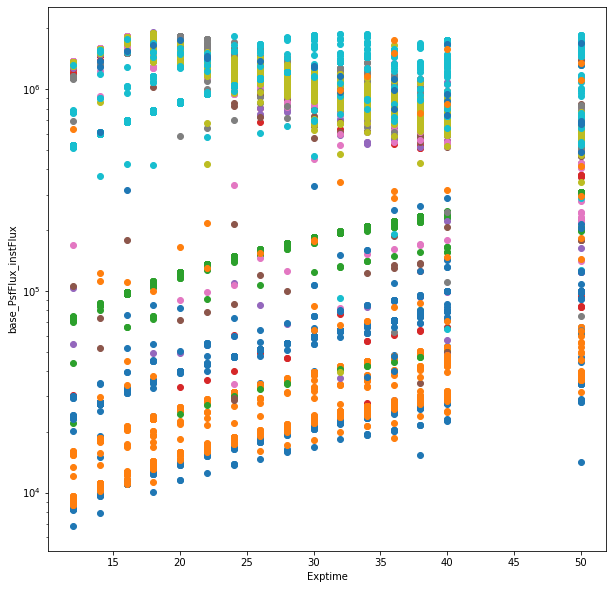

In [274]:
from astropy.table import Table, join, hstack
indexes = numpy.arange(2400)
basetable = ( Table( [ indexes+1,], names=("Index",) ) )

# sorting tables, padding missing, and joining tables
arr = []
for exp, spotindex, iarr in zip(Exptime, SpotIndex, Iarr):
    table = (Table( [spotindex, iarr], names=("Index","Iarr"), meta={ "exptime": exp } ))
    arr.append( join( basetable, table, keys="Index", join_type="left" )["Iarr"] )
arr = hstack([*arr])

fig = plt.figure(figsize=(10,10))
for i in indexes[::200]:
    I = list(arr[i].values())
    plt.plot(Exptime, I, "o" )

plt.semilogy()
#plt.ylim(-3,3)
plt.xlabel( "Exptime" )
plt.ylabel( fluxkey )